In [14]:
# Importamos librerias
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
%matplotlib inline
from sklearn.model_selection import train_test_split

In [85]:
# Cargamos un df desde un archivo de Excel
import pandas as pd
workbook = pd.ExcelFile('pbi max.xlsx') # tiene que estar en misma carpeta
d = {}
for Hoja1 in workbook.sheet_names:
    df = workbook.parse(Hoja1) # ponemos index columna nulo xq ya tiene numerado el excel (en este caso no)
print(f" Filas y Columnas: {df.shape}")
print("------------------------------------------------------------------------------------------")
print(f" Tipo de dato de columnas: {df.dtypes}")
print("------------------------------------------------------------------------------------------")
print(df.describe())
print("------------------------------------------------------------------------------------------")
X = df[['k','l (iel)','l2 (sipa)','l3 (eph)']] # (df[:,0:4]) pongo el num de las características que tengo
Y = df['y'] # (df[:,4]) pongo el num de características que tengo
# Obtener el nombre de la primera columna
first_col = df.columns[0]
# Reordenar las columnas, excluyendo la primera y añadiéndola al final (pongo la clase al final)
df = df[[col for col in df.columns if col != first_col] + [first_col]]
df

 Filas y Columnas: (44, 5)
------------------------------------------------------------------------------------------
 Tipo de dato de columnas: y            float64
k            float64
l (iel)      float64
l2 (sipa)    float64
l3 (eph)     float64
dtype: object
------------------------------------------------------------------------------------------
                   y              k     l (iel)     l2 (sipa)   l3 (eph)
count      44.000000      44.000000   44.000000     44.000000  44.000000
mean   703105.647971  137740.087578  132.968907  12164.156818   0.422944
std     41577.518555   17723.796203    2.708524    506.895000   0.019874
min    609379.989465   76231.157865  127.613600  11229.400000   0.334000
25%    678404.737567  129656.937284  131.124925  11879.900000   0.416750
50%    700751.309221  140613.419993  134.076550  12103.850000   0.422707
75%    723974.386012  148319.673638  134.910975  12317.650000   0.430000
max    791235.965542  163420.855068  136.849300  13377.400000

,k,l (iel),l2 (sipa),l3 (eph),y
0,133273.112926,133.8556,11229.4,0.422000,677085.529173
1,150469.415305,134.4043,11358.8,0.431000,776486.602799
2,152737.114105,134.9382,11519.7,0.429000,721458.944216
3,147746.629603,134.9019,11608.3,0.427000,706597.345023
4,131370.536310,134.5400,11546.3,0.418000,671066.046635
5,141073.189430,134.3656,11669.7,0.414000,760576.868348
6,140281.453589,134.4339,11722.8,0.413000,690879.798252
7,132033.409489,134.5990,11730.9,0.421000,686701.470619
8,128790.253313,134.4130,11796.9,0.414000,672749.811392
9,143522.138762,135.1065,11922.7,0.415000,791235.965542


# UNIDAD 4 (Feature Selection y Feature Importance)

## Feature Selection

In [12]:
# Usamos la Correlación de Pearson

# Buscar buenas correlaciones de las características con la clase y descartar aquellas características con muchas correlaciones con otras características (queremos características independientes entre sí)
# Si entre 2 características hay alta correlación, procuro mantener aquella con correlación mayor respecto a la clase o menor con respecto a demás características
df.corr()

# Vemos buenas correlaciones de 'k','l' y 'l3' con respecto a 'y' (nuestra variable a predecir)
# Vemos también una correlación alta entre 'k' y 'l3', y medianamente altas  entre 'l' y 'k' y entre 'l3' y 'l2' (características entre si)

,y,k,l (iel),l2 (sipa),l3 (eph)
y,1.000000,0.697913,0.526315,0.179083,0.472360
k,0.697913,1.000000,0.540448,0.381824,0.660424
l (iel),0.526315,0.540448,1.000000,-0.055324,0.301933
l2 (sipa),0.179083,0.381824,-0.055324,1.000000,0.583777
l3 (eph),0.472360,0.660424,0.301933,0.583777,1.000000


In [16]:
# Probamos con la Eliminación Backward

# Agregar columna de unos constante, obligatoria para el modelo sm.OLS
X_1 = sm.add_constant(X)
model = sm.OLS(Y, X_1).fit() # usamos la clase (y) junto con las características en conjunto con la columna de 1 (X_1) para entrenar el modelo
# model.pvalues  # vemos los p-values de las características
pvalues_df = pd.DataFrame(model.pvalues, columns=['p-value']) # creamos un df con los p-valores de las características
feature_names = ['const'] + ['k','l (iel)','l2 (sipa)','l3 (eph)'] # todas menos la clase 
pvalues_df.index = feature_names # agrego los nombres de las características a las filas
pvalues_df

# Vemos que la única variable menor a 0.05 es 'k', mientras que las otras son candidatas a ser eliminadas ('l' la más cercana al 0.05)
# Por lo que el modelo considera que la variable que le brinda mayor explicación de 'y' es 'k'

,p-value
const,0.671354
k,0.001771
l (iel),0.186016
l2 (sipa),0.596907
l3 (eph),0.620316


In [20]:
# Probamos con la Selección Univariable

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression # chi2 para clasificación
# extracción de características
test = SelectKBest(score_func=f_regression,k=4) # k son las variables con las que me voy a quedar (si veo que hay más características con puntajes cercanos puedo ampliar)
fit = test.fit(X,Y)
# mostrar puntuaciones
np.set_printoptions(precision=3)
print(list(X.columns))
print(fit.scores_) # imprimo las puntuaciones de todas las características
features = fit.transform(X) # me guardo las 4 mejores características ()
# mostrar características seleccionadas
print(features [0:5,:])

# Selecciono características sobre el puntaje del segundo array 
# El último print me muestra las 5 primeras filas de las 4 mejores características seleccionadas 

# Vemos que en términos de explicación, 'k' parece ser la más relevante, seguida de 'l', luego 'l3' y por último 'l2'

['k', 'l (iel)', 'l2 (sipa)', 'l3 (eph)']
[39.884 16.092  1.392 12.063]
[[1.333e+05 1.339e+02 1.123e+04 4.220e-01]
 [1.505e+05 1.344e+02 1.136e+04 4.310e-01]
 [1.527e+05 1.349e+02 1.152e+04 4.290e-01]
 [1.477e+05 1.349e+02 1.161e+04 4.270e-01]
 [1.314e+05 1.345e+02 1.155e+04 4.180e-01]]


In [28]:
# Probamos la Eliminación Recursiva de Características

from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
# extracción de características
model = LinearRegression()
rfe = RFE(model, n_features_to_select=3) # "n_features_to_select" para indicar el número de características a obtener
fit = rfe.fit(X,Y)
print(list(X.columns)) # todas las características
print(f"Num Features: {fit.n_features_to_select}") # número de características
print(f"Selected Features: {fit.support_}") # características seleccionadas (seleccionadas como True)
print(f"Features Ranking: {fit.ranking_}") # ranking de características
# RFE comprueba también la combinación de atributos para elaborar su ranking (a diferencia de selección univariable que solo analiza con respecto a la clase)

# Si le pido que me elija 2 características, me elige 'l' y 'l3' para explicar a 'y', y si le pido 3 me agrega a 'l2'

['k', 'l (iel)', 'l2 (sipa)', 'l3 (eph)']
Num Features: 3
Selected Features: [False  True  True  True]
Features Ranking: [2 1 1 1]


## Feature Importance

In [52]:
# Probamos Decision Trees

# Busca combinaciones de características que puedan brindar un mayor grado de explicación de los datos de entrenamiento (que sirven luego para predecir sobre los datos de validación)
from sklearn.tree import DecisionTreeRegressor # para ver características más importantes (si es problema de Clasificación "DecisionTreeClassifier")
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
# Genera la partición
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=7) # partición de 80/20
# Como según el valor de random_state cambia la forma en que se dividen los datos, puedo tomar un array del [0-9] del mismo y hacer un promedio del rendimiento del modelo con datos de prueba y validación
# Aprende el modelo
depth = 3 # profundidad de 3 (con produndidad de 2 tenemos algo de Underfitting y mayor predicción de datos de validación, con 3 muy poco Overfitting)
tree = DecisionTreeRegressor(criterion='squared_error', max_depth=depth) # criterio del arbol: MSE 
tree.fit(X_train,Y_train) # entreno al modelo
# Extrae los índices de las variables utilizadas
subset = np.unique(tree.tree_.feature[tree.tree_.feature >= 0]) # me muestra las características que utilizó el arbol
print("Variables: ", X.shape[1]) # me imprime la cantidad de variables o características (filas=0,columnas=1)
print("Variables utilizadas: ", subset) # me aclara cuáles variables han obtenido mejor resultado (corroborar en df)
print("Training: ", tree.score(X_train,Y_train).round(2)) # efectividad del modelo para con los datos de prueba
print("Test: ", tree.score(X_test,Y_test).round(2)) # efectividad del modelo para con los datos de validación
print(df.columns[0],df.columns[1],df.columns[2],df.columns[3]) # vemos las características con que llegó al resultado
# Entre ambos coeficientes podemos ver si se produce Overfitting (si la predicción con los datos de prueba es mucho más efectiva que con los de validación)
# o Underfitting (si la predicción con los datos de prueba es baja o con los de validación es mucho más alto).
# Lo ideal es que los 2 sean similares, pudiendo cambiar la profundidad para lograrlo (si la bajo se ajusta menos al entrenamiento y reduzco Overfitting y si la subo se ajusta más al entrenamient y reduzco Underfitting)
# En cada ejecución también cambian los resultados y parámetros usados

# En este caso, con la profundidad=3 (mayor correspondencia con Test) me utiliza las 4 variables

Variables:  4
Variables utilizadas:  [0 1 2 3]
Training:  0.89
Test:  -0.09
k


In [53]:
# Si buscamos obtener un valor más obejtivo del rendimiento del modelo y medir la sensibilidad de la partición de los datos en train/test, 
# podemos hacer un promedio de los rendimientos obtenidos cambiando el valor de random_state en la partición
# También podemos tomar las características que más se repiten en los mejores resultados con respecto al test
from sklearn.tree import DecisionTreeRegressor # si es problema de Regresión "DecisionTreeRegressor"
from sklearn.model_selection import train_test_split
import numpy as np

# Suponiendo que X y Y están definidos
random_states = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]  # puedes usar más valores para una mejor estimación
depth = 3
train_scores = []
test_scores = []

for state in random_states:
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=state)
    tree = DecisionTreeRegressor(criterion='squared_error', max_depth=depth)
    tree.fit(X_train, Y_train)
    
    train_score = tree.score(X_train, Y_train)
    test_score = tree.score(X_test, Y_test)
    
    train_scores.append(train_score)
    test_scores.append(test_score)
    
    print(f"Random state: {state}")
    print("Variables: ", X.shape[1])
    print("Variables utilizadas: ", np.unique(tree.tree_.feature[tree.tree_.feature >= 0]))
    print("Training: ", train_score.round(2))
    print("Test: ", test_score.round(2))
    print()

# Promedios de las métricas
avg_train_score = np.mean(train_scores)
avg_test_score = np.mean(test_scores)

print("Promedio Training: ", avg_train_score.round(2))
print("Promedio Test: ", avg_test_score.round(2))

# Las variables más utilizadas fueron [0,1,3], mientras que también podemos observar que el conjunto de datos es muy sensible a la aleatoriedad, ya que al cambiar la semilla los resultados del Test varían drásticamente
# La sensibilidad ante el random_state probablemente lo produzca la poca cantidad de datos de la que disponemos

Random state: 0
Variables:  4
Variables utilizadas:  [0 1 3]
Training:  0.87
Test:  0.6

Random state: 1
Variables:  4
Variables utilizadas:  [0 1 2 3]
Training:  0.81
Test:  0.86

Random state: 2
Variables:  4
Variables utilizadas:  [0 1 3]
Training:  0.81
Test:  0.33

Random state: 3
Variables:  4
Variables utilizadas:  [0 1 3]
Training:  0.9
Test:  0.26

Random state: 4
Variables:  4
Variables utilizadas:  [0 3]
Training:  0.81
Test:  0.06

Random state: 5
Variables:  4
Variables utilizadas:  [0 1 3]
Training:  0.91
Test:  0.13

Random state: 6
Variables:  4
Variables utilizadas:  [0 1 2 3]
Training:  0.83
Test:  -0.07

Random state: 7
Variables:  4
Variables utilizadas:  [0 1 2 3]
Training:  0.89
Test:  -0.09

Random state: 8
Variables:  4
Variables utilizadas:  [0 1 2 3]
Training:  0.86
Test:  0.62

Random state: 9
Variables:  4
Variables utilizadas:  [0 1 2 3]
Training:  0.84
Test:  -0.08

Promedio Training:  0.85
Promedio Test:  0.26


In [62]:
# Probamos Extra Trees

from sklearn.ensemble import ExtraTreesRegressor # si es problema de Regresión "ExtraTreesRegressor"
# extracción de características
model = ExtraTreesRegressor() # podemos aclarar número de árboles y profundidad con "max_depth=", pero si lo dejamos sin identificar el algoritmo determina la profundidad hasta el punto que no comience a generar Overfitting
model.fit(X,Y)
print(list(X.columns)) # características del df (ignorar clase)
print(model.feature_importances_) # importancia de cada característica para la predicción del modelo (plas,age,mass)
# podemos poner model. y ver las statement que tiene para obtener información de como procedió para asignarle importancia a las características (base_estimator_,classes_,criterion,max_depth,max_leaf_nodes(num nodos),n_estimators(num árboles))
# Extra Trees construye varios árboles de decisión de manera más automática

# Podemos ver que en terminos de importancia, me organiza a las variables de la siguiente manera: 'k','l','l3','l2'

['k', 'l (iel)', 'l2 (sipa)', 'l3 (eph)']
[0.416 0.251 0.111 0.223]


In [72]:
# Probamos el Extra Trees

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

# Genera la partición
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

# Entrenamos al algoritmo con todas las características
forest = RandomForestRegressor(n_estimators=100) # número de árboles (100)
forest.fit(X_train, Y_train) # entreno el 'bosque' de árboles

# Extrae las importancias
importances = forest.feature_importances_

# Predicción
y_pred = forest.predict(X_test)

# Evaluación del modelo
mse = mean_squared_error(Y_test, y_pred)
r2 = r2_score(Y_test, y_pred)

print(f"Mean Squared Error (con todas las variables): {mse}")
print(f"R² (con todas las variables): {r2}")

# Mostrar importancia de características
print("Importancia de las características:")
for i, col in enumerate(X.columns):
    print(f"{col}: {importances[i]}")

# La importancia asignada a las características por Extra Trees es la siguiente: 'k','l3','l','l2' 

Mean Squared Error (con todas las variables): 1120846444.1499803
R² (con todas las variables): 0.552680985668655
Importancia de las características:
k: 0.593561263514177
l (iel): 0.11680468357439046
l2 (sipa): 0.10121334179899814
l3 (eph): 0.18842071111243422


In [86]:
# Extraigo los índices ordenados de mayor a menor importancia de características
ranking = np.argsort(importances)[::-1] 
print("Características ordenadas por importancia (de menor a mayor):") # me muestra el ranking de características
print(X.columns[ranking])

Características ordenadas por importancia (de menor a mayor):
Index(['k', 'l3 (eph)', 'l (iel)', 'l2 (sipa)'], dtype='object')


Características ordenadas por importancia:
k: 0.5936
l3 (eph): 0.1884
l (iel): 0.1168
l2 (sipa): 0.1012


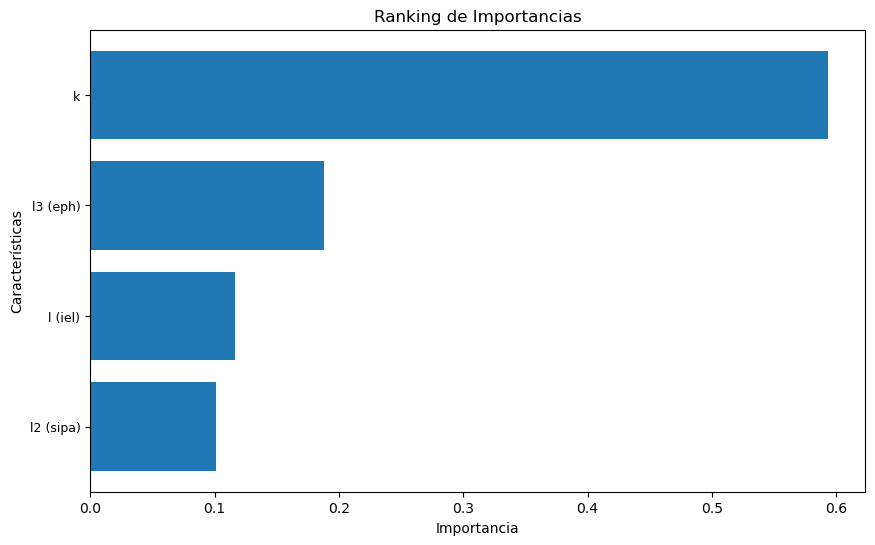

In [89]:
# Imprime los nombres de las características ordenadas por importancia
feature_names = X.columns if isinstance(X, pd.DataFrame) else X.feature_names
print("Características ordenadas por importancia:")
for idx in ranking:
    print(f"{feature_names[idx]}: {importances[idx]:.4f}")
# Visualizo los índices de importancia de las característcas ordenados de menor a mayor en un gráfico de barras
plt.figure(figsize=(10, 6))
plt.title("Ranking de Importancias")
plt.barh(range(len(ranking)), importances[ranking], align='center')
feature_names = ['k','l (iel)','l2 (sipa)','l3 (eph)'] # volvemos a declarar feature_names por haberlo transformado antes en Eliminación Backward
plt.yticks(range(len(ranking)), [feature_names[i] for i in ranking], fontsize=9)
plt.xlabel("Importancia")
plt.ylabel("Características")
plt.gca().invert_yaxis()
plt.show()
# Podemos delimitar hasta el punto que consideremos importantes a características 

In [97]:
# Produzcamos predicciones sin tomar las 2 y 3 peores características según el Random Forest
selected_features = ranking [:-3] # tomo todo menos las últimas 2/3 características
# ranking [-5:] para las peores 5 características, ranking [:5] para las mejores 5 características, etc
forest.fit(X_train.iloc[:, selected_features], Y_train)
Y_pred_selected = forest.predict(X_test.iloc[:, selected_features]) # tampoco para el testeo tomamos el resto de características
# Evaluación del modelo
mse = mean_squared_error(Y_test, Y_pred_selected)
r2 = r2_score(Y_test, Y_pred_selected)
print(f"Mean Squared Error (con todas menos las peores 2 variables): {mse}")
print(f"R² (con todas menos las peores 2 variables): {r2}")
# Ver hasta que punto estoy dispuesto a perder precisión en el modelo por eliminar características

Mean Squared Error (con todas menos las peores 2 variables): 1269385881.771606
R² (con todas menos las peores 2 variables): 0.493400327579377


Mejor alpha usando LassoCV: 502611.36687583645
Mejor score usando LassoCV: 0.4953113262609944
           Coefficient
k             1.701338
l (iel)       0.000000
l2 (sipa)    -6.023268
l3 (eph)      0.000000
Lasso eligió 2 variables y eliminó las otras 2 variables


Text(0.5, 1.0, 'Importancia de características usando modelo de Lasso')

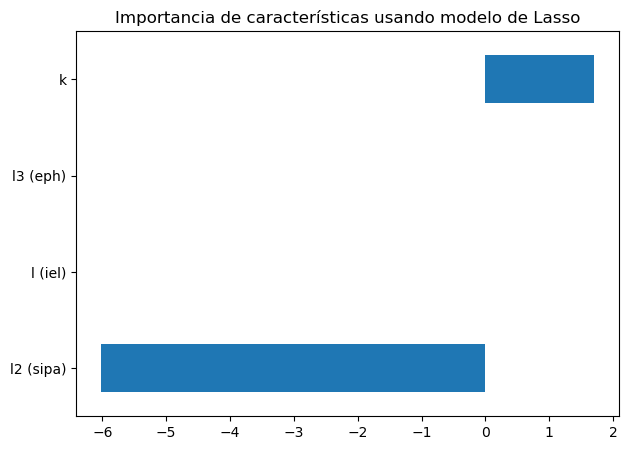

In [98]:
# Probamos con Lasso

# Lasso es un tipo de regresión lineal (para problemas de regresión) que aplica penalizaciones a características
from sklearn.linear_model import LassoCV
# Importancia de las características
reg = LassoCV()
reg.fit(X,Y) # hago la regresión con todos los datos

print(f"Mejor alpha usando LassoCV: {reg.alpha_}") # el valor del hiperparámetro utilizado por Lasso
print(f"Mejor score usando LassoCV: {reg.score(X,Y)}") # 
coef = pd.DataFrame(reg.coef_, df.columns[0:4], columns=['Coefficient']) # configuro el df (data,filas(index),columnas)
print(coef) # me muestra los coeficientes que le ha dado Lasso a las características

# Características elegidas y eliminadas
print("Lasso eligió " + str(sum(coef['Coefficient'] != 0)) + " variables y eliminó las otras " 
      +  str(sum(coef['Coefficient'] == 0)) + " variables") # me elige los coeficientes distintos de 0 y me descarta los iguales a 0 (NOX,CHAS,INDUS)

# Mostrar coeficientes
imp_coef = coef['Coefficient'].sort_values() # ordeno los valores del df de mayor a menor
plt.rcParams['figure.figsize'] = (7.0,5.0)
imp_coef.plot (kind='barh') # tipo de gráfico de barra horizontal
plt.title("Importancia de características usando modelo de Lasso")

# Las características con barras nulas o casi nulas son las que aportan menos (o nula) información al modelo. Se nos descartan directamente las barras nulas

# En este caso, Lasso me eligió 'k' y 'l2' como las más importantes para el modelo

# UNIDAD 5 (Fase de Modelado)

In [100]:
# Importo librerías para problema de Regresión
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold,cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR

LR: Mean MSE: -949408828.7383, Std MSE: 666593671.8405
LR: Mean R²: -0.6369, Std R²: 1.9294
Ridge: Mean MSE: -905125855.7485, Std MSE: 629928825.8352
Ridge: Mean R²: -0.6433, Std R²: 2.0134
Lasso: Mean MSE: -948557208.8848, Std MSE: 665264113.0283
Lasso: Mean R²: -0.6377, Std R²: 1.9320
ElasticNet: Mean MSE: -904571399.9902, Std MSE: 626606527.9393
ElasticNet: Mean R²: -0.6114, Std R²: 1.9189
KNN: Mean MSE: -1118071719.7678, Std MSE: 769234263.6399
KNN: Mean R²: -0.4411, Std R²: 1.0314
Decision Tree: Mean MSE: -1252853552.0273, Std MSE: 792704194.0525
Decision Tree: Mean R²: -2.6986, Std R²: 7.1228
SVR: Mean MSE: -1687742977.2210, Std MSE: 1206224943.8552
SVR: Mean R²: -0.9685, Std R²: 1.2812


Text(0, 0.5, 'MSE')

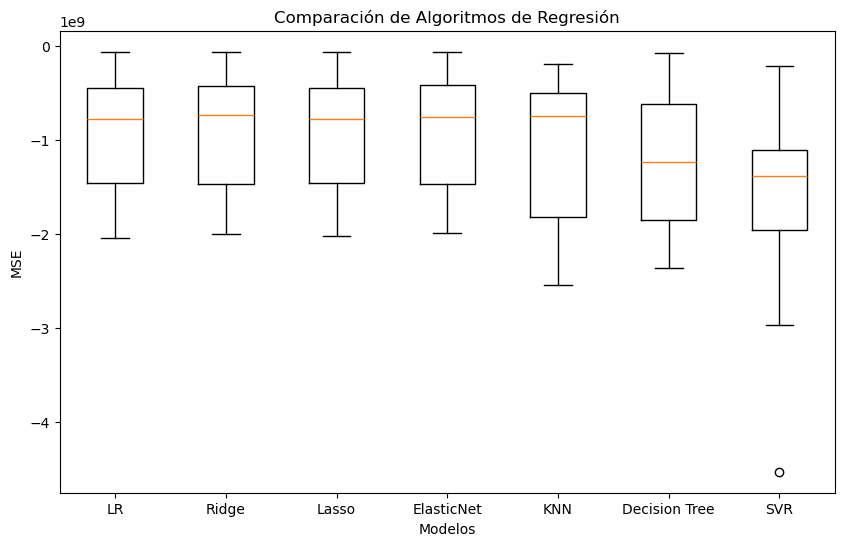

In [103]:
# Comparo entre todos los modelos posibles de Regresión

# Comparo Algoritmos (Regresión)
# Preparar modelos para regresión
models = []
models.append(('LR', LinearRegression()))
models.append(('Ridge', Ridge()))
models.append(('Lasso', Lasso()))
models.append(('ElasticNet', ElasticNet()))
models.append(('KNN', KNeighborsRegressor()))
models.append(('Decision Tree', DecisionTreeRegressor()))
models.append(('SVR', SVR()))

# Evaluar cada modelo por turno
results = []
names = []
scoring = 'neg_mean_squared_error'  # Utilizamos MSE para evaluación en problemas de regresión

for name, model in models:
    kfold = KFold(n_splits=10, random_state=7, shuffle=True)
    cv_results = cross_val_score(model, X, Y, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    print(f"{name}: Mean MSE: {cv_results.mean():.4f}, Std MSE: {cv_results.std():.4f}")

# Podemos también imprimir los resultados en términos de R² para tener una idea adicional de la precisión
    cv_results_r2 = cross_val_score(model, X, Y, cv=kfold, scoring='r2')
    print(f"{name}: Mean R²: {cv_results_r2.mean():.4f}, Std R²: {cv_results_r2.std():.4f}")

# Resultados en términos de MSE
plt.figure(figsize=(10, 6))
plt.boxplot(results, labels=names)
plt.title('Comparación de Algoritmos de Regresión')
plt.xlabel('Modelos')
plt.ylabel('MSE') # en realidad toma en cuenta el R2

In [108]:
# Otra opción para encontrar el modelo indicado es probar todos los modelos sin configuración de hiperparámetros de la siguiente manera
# En este caso se efectúa el entrenamiento por división en train/test

# Me recomienda los mejores modelos base (sin configuración de hiperparámetros) para nuestro set de datos
from lazypredict.Supervised import LazyRegressor
from sklearn import datasets
from sklearn.utils import shuffle
import numpy as np
import pandas as pd

# Regression problem
import pandas as pd
workbook = pd.ExcelFile('pbi max.xlsx') # tiene que estar en misma carpeta
d = {}
for Hoja1 in workbook.sheet_names:
    df = workbook.parse(Hoja1)
X = df[['k','l3 (eph)']] # (df[:,0:4])
Y = df['y'] # (df[:,4])
 
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=.3,random_state =7) 
reg = LazyRegressor(verbose=0,ignore_warnings=True, custom_metric=None ) # Ver lo de custom_metric
models,predictions = reg.fit(X_train, X_test, y_train, y_test)
models

# Aca podemos ver que no tengo modelos recomendados con tanto nivel de predicción, esto en parte se debe a que todavía no efectúe la eliminación de características
# Podemos comprobar configurando de manera diferente X (cambiando las características a usar) el nivel de predicción que puedo conseguir
# Puedo probar también variando el nivel de división por train/test e incluso ponderar diferentes resultados de random_state
# A pesar de la varianza por random_state, puedo ver que los modelos recomendados siguen siendo los mismos

100%|██████████████████████████████████████████████████████████████████████████████████| 42/42 [00:01<00:00, 41.52it/s]

[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 30, number of used features: 0
[LightGBM] [Info] Start training from score 696122.383333
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the

,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
ExtraTreesRegressor,0.55,0.62,28969.41,0.10
RandomForestRegressor,0.51,0.58,30377.83,0.17
GradientBoostingRegressor,0.46,0.54,31924.94,0.05
OrthogonalMatchingPursuit,0.41,0.50,33326.23,0.01
BaggingRegressor,0.38,0.48,34003.55,0.03
DecisionTreeRegressor,0.38,0.47,34095.03,0.02
PoissonRegressor,0.38,0.47,34190.89,0.01
Lasso,0.36,0.46,34515.58,0.01
LassoLars,0.36,0.46,34515.68,0.01


In [ ]:
# Probar algoritmos de Ensemble